In [76]:
#Importing the breast cancer dataset and libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [77]:
breast = load_breast_cancer()

Our data comes in a dictionary so we have to access the data key to get the features data and the target key to get the target variables

In [78]:
breast_data = breast.data
breast_data.shape

(569, 30)

Therefore, we have 569 samples and 30 features

In [79]:
breast_labels = breast.target
breast_labels.shape

(569,)

And also we have the loaded the target variable for the 569 samples

In [80]:
labels = np.reshape(breast_labels,(569,1)) #We have to reshape in order to be able to concatenate with the data
breast_data = np.concatenate([breast_data,labels], axis = 1)
breast_data.shape

(569, 31)

Now we have concatenated the target variable with the rest of the data and we can load them to a pandas dataframe

In [81]:
breast_dataset = pd.DataFrame(breast_data)
breast_dataset

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


Now lets the check the feature names and insert them into the dataframe

In [82]:
features = breast.feature_names
print(features)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


We're missing the target variable on the feature names so we'll have to add it manually

In [83]:
features_and_target = np.append(features,'label')

In [84]:
breast_dataset.columns = features_and_target

In [85]:
breast_dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


Let's rename the target variable to benign and malignant instead of 0 and 1

In [86]:
breast_dataset['label'].replace(0,'Benign', inplace=True)
breast_dataset['label'].replace(1,'Malignant', inplace=True)

Now we're gonna standardize the data since PCA output is based on the scale of the features data 

In [87]:
x = breast_dataset.loc[:,features].values
x = StandardScaler().fit_transform(x)

In [88]:
x.shape

(569, 30)

To check if the data is really normalized we need a mean of zero and a standard deviation of 1

In [89]:
np.mean(x), np.std(x)

(-6.826538293184326e-17, 1.0)

Now we're gonna convert the normalized features to a dataframe

In [90]:
feat_cols = ['feature' + str(i) for i in range (x.shape[1])]

In [91]:
norm_data = pd.DataFrame(x, columns = feat_cols)
norm_data

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


The next step is project the thirty dimensional breast data into two principal components (PC1 and PC2)

In [92]:
pca = PCA(n_components=2)
pca_breast = pca.fit_transform(x)

In [93]:
pca_breast.shape

(569, 2)

Then we'll create a dataframe with the PC1 and PC2 values for all the 569 samples

In [94]:
pca_breast_df = pd.DataFrame(data = pca_breast,
columns = ['PC1','PC2'])
pca_breast_df.head(10)

,PC1,PC2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
5,2.380247,3.949929
6,2.238883,-2.690031
7,2.143299,2.340244
8,3.174924,3.391813
9,6.351747,7.727174


Now we can get the explained variance ratio that will provide us the amount of information (or variance) each principal component has 

In [95]:
evr = pca.explained_variance_ratio_

In [96]:
print(f'Explained variance ratio for PC1: {evr[0]:.3f}')
print(f'Explained variance ratio for PC1: {evr[1]:.3f}')

Explained variance ratio for PC1: 0.443
Explained variance ratio for PC1: 0.190


Therefore, PC1 hold 44.3 % of the information and PC2 holds 19% of the information. So, when we reduce the 30 dimensional data into 2 dimensional data we lost 36.8% of the information    

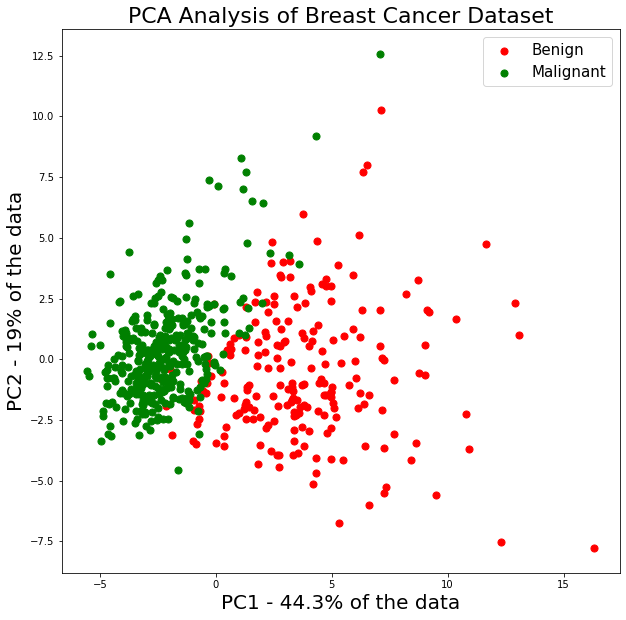

In [100]:
targets = ['Benign', 'Malignant']
colors = ['r','g']

plt.figure(figsize=(10,10))
plt.xlabel('PC1 - 44.3% of the data', fontsize = 20)
plt.ylabel('PC2 - 19% of the data', fontsize = 20)
plt.title('PCA Analysis of Breast Cancer Dataset', fontsize = 22)

for t , c in zip(targets,colors):
    index_to_keep = breast_dataset['label'] == t
    plt.scatter(pca_breast_df.loc[index_to_keep, 'PC1'],
    pca_breast_df.loc[index_to_keep, 'PC2'],
    color = c,
    s = 50)

plt.legend(targets, fontsize = 15)

From the above graph is clear that when the two classed (benign and malignant) are projected into a two dimensional space with PC1 and PC2 on the axis they can clearly be separable. Other aspect is that the benign class is spread out when compared to the malign class which is more dense.